# Cross-Technology QC Metrics Comparison

Compare gene and guide mapping metrics across datasets.

**Input:** `latest_qc_paths.tsv`  
**Output:** Combined metrics TSVs and comparison barplots

In [18]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [19]:
# Project root
PROJECT_ROOT = Path("/Users/adamklie/Desktop/projects/tf_perturb_seq")

# Add config to path for color loader
sys.path.append(str(PROJECT_ROOT / "config"))
from loader import load_colors

dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

In [20]:
# Paths
BASE_DIR = PROJECT_ROOT / "datasets" / "technology-benchmark_WTC11_TF-Perturb-seq"
QC_PATHS_FILE = BASE_DIR / "latest_qc_paths.tsv"
OUTPUT_DIR = BASE_DIR / "results" / "cross_tech_comparison"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Reading paths from: {QC_PATHS_FILE}")
print(f"Output directory: {OUTPUT_DIR}")

Reading paths from: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/latest_qc_paths.tsv
Output directory: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison


In [21]:
# Load the paths manifest
paths_df = pd.read_csv(QC_PATHS_FILE, sep="\t")
paths_df

,dataset,qc_dir,gene_metrics,guide_metrics,intended_target_results,intended_target_metrics,trans_results,trans_metrics
0,Hon_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Hon_WTC11-benchmark_gene_metrics.tsv,mapping_guide/Hon_WTC11-benchmark_guide_metric...,intended_target/Hon_WTC11-benchmark_intended_t...,intended_target/Hon_WTC11-benchmark_intended_t...,trans/Hon_WTC11-benchmark_trans_results.tsv,trans/Hon_WTC11-benchmark_trans_metrics.tsv
1,Huangfu_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Huangfu_WTC11-benchmark_TF-Pertur...,mapping_guide/Huangfu_WTC11-benchmark_TF-Pertu...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...


## Gene Metrics

In [22]:
# Load and combine gene metrics
gene_metrics_list = []
for _, row in paths_df.iterrows():
    gene_path = Path(row['qc_dir']) / row['gene_metrics']
    if gene_path.exists():
        df = pd.read_csv(gene_path, sep="\t")
        df['dataset'] = row['dataset']
        gene_metrics_list.append(df)
    else:
        print(f"Warning: {gene_path} not found")

gene_metrics_df = pd.concat(gene_metrics_list, ignore_index=True)
gene_metrics_df.head()

,batch,n_cells,umi_median,umi_mean,umi_std,umi_min,umi_max,umi_q25,umi_q75,genes_median,...,genes_q25,genes_q75,mito_median,mito_mean,mito_std,mito_min,mito_max,mito_q25,mito_q75,dataset
0,all,91866,4839.5,4981.5870,2084.4204,567.0,19969.0,3627.0,6187.75,2444.0,...,1977.0,2928.0,5.579399,6.391500,3.420365,0.0,19.987062,4.243295,7.421918,Hon_WTC11-benchmark_TF-Perturb-seq
1,IGVFDS6244NAXC,23275,5475.0,5658.4326,2218.6497,631.0,19969.0,4182.5,6940.00,2679.0,...,2200.0,3171.0,5.699353,6.352461,3.265819,0.0,19.962860,4.333792,7.407407,Hon_WTC11-benchmark_TF-Perturb-seq
2,IGVFDS8721BKRO,22045,4780.0,4842.3510,2062.6840,567.0,18175.0,3544.0,6055.00,2412.0,...,1936.0,2872.0,5.727224,6.599521,3.580380,0.0,19.987062,4.364157,7.644500,Hon_WTC11-benchmark_TF-Perturb-seq
3,IGVFDS9332KWPJ,21172,4532.5,4647.9520,2007.6003,620.0,17786.0,3309.5,5863.00,2337.0,...,1857.0,2828.0,5.633409,6.527457,3.447510,0.0,19.985876,4.268903,7.745919,Hon_WTC11-benchmark_TF-Perturb-seq
4,IGVFDS9613DDRB,25374,4615.0,4760.0845,1891.3174,569.0,19346.0,3544.0,5837.00,2359.0,...,1935.0,2809.0,5.299532,6.133138,3.376114,0.0,19.979242,4.067741,7.001572,Hon_WTC11-benchmark_TF-Perturb-seq


In [23]:
# Save combined gene metrics
gene_metrics_df.to_csv(OUTPUT_DIR / "combined_gene_metrics.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'combined_gene_metrics.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/combined_gene_metrics.tsv


In [24]:
# Filter to 'all' batch (aggregate metrics)
gene_all = gene_metrics_df[gene_metrics_df['batch'] == 'all'].copy()
gene_all['dataset'] = pd.Categorical(gene_all['dataset'], categories=dataset_order, ordered=True)
gene_all = gene_all.sort_values('dataset')
gene_all

,batch,n_cells,umi_median,umi_mean,umi_std,umi_min,umi_max,umi_q25,umi_q75,genes_median,...,genes_q25,genes_q75,mito_median,mito_mean,mito_std,mito_min,mito_max,mito_q25,mito_q75,dataset
0,all,91866,4839.5,4981.5870,2084.4204,567.0,19969.0,3627.0,6187.75,2444.0,...,1977.0,2928.0,5.579399,6.391500,3.420365,0.0,19.987062,4.243295,7.421918,Hon_WTC11-benchmark_TF-Perturb-seq
5,all,114470,4335.0,4595.6210,1991.5315,542.0,24957.0,3274.0,5602.75,2396.0,...,1923.0,2888.0,8.527343,9.206610,3.773856,0.0,19.993950,6.767537,11.095521,Huangfu_WTC11-benchmark_TF-Perturb-seq
10,all,264159,773.0,7218.4727,14820.5650,548.0,168069.0,678.0,1039.00,621.0,...,557.0,788.0,5.033557,6.045498,4.696174,0.0,19.999464,2.173913,8.820458,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3
15,all,33938,23985.0,25134.1350,19216.0040,1218.0,178740.0,8468.0,37580.75,6138.0,...,3507.0,7460.0,6.705018,7.702603,5.348294,0.0,19.994417,3.997640,10.866023,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2


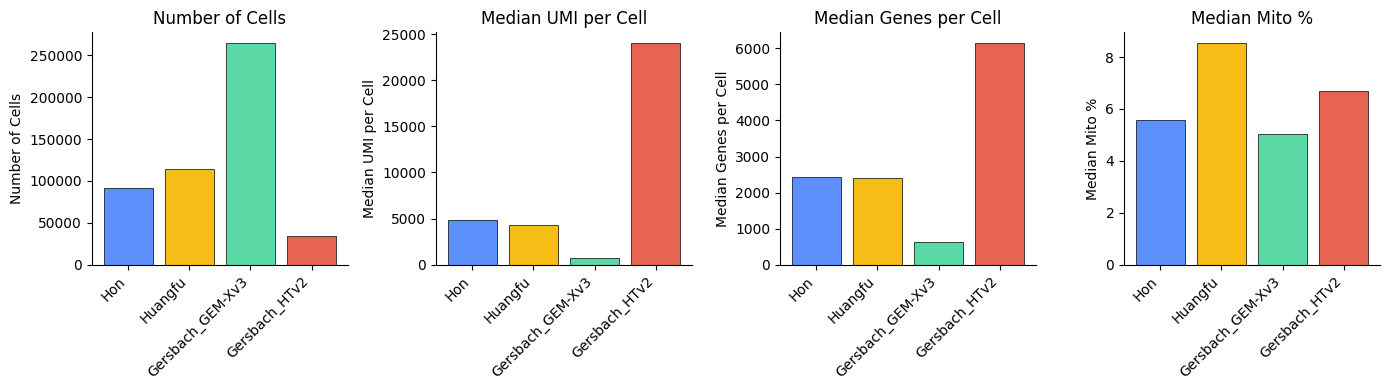

In [25]:
# Key gene metrics to compare
gene_metrics_to_plot = [
    ('n_cells', 'Number of Cells'),
    ('umi_median', 'Median UMI per Cell'),
    ('genes_median', 'Median Genes per Cell'),
    ('mito_median', 'Median Mito %'),
]

fig, axes = plt.subplots(1, len(gene_metrics_to_plot), figsize=(3.5 * len(gene_metrics_to_plot), 4))

for ax, (col, title) in zip(axes, gene_metrics_to_plot):
    colors = [dataset_colors.get(ds, 'gray') for ds in gene_all['dataset']]
    bars = ax.bar(range(len(gene_all)), gene_all[col], color=colors, edgecolor='black', linewidth=0.5)
    ax.set_xticks(range(len(gene_all)))
    ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in gene_all['dataset']], 
                       rotation=45, ha='right')
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "gene_metrics_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Guide Metrics

In [26]:
# Load and combine guide metrics
guide_metrics_list = []
for _, row in paths_df.iterrows():
    guide_path = Path(row['qc_dir']) / row['guide_metrics']
    if guide_path.exists():
        df = pd.read_csv(guide_path, sep="\t")
        df['dataset'] = row['dataset']
        guide_metrics_list.append(df)
    else:
        print(f"Warning: {guide_path} not found")

guide_metrics_df = pd.concat(guide_metrics_list, ignore_index=True)
guide_metrics_df.head()

,batch,n_cells,guide_umi_median,guide_umi_mean,guide_umi_std,guide_umi_min,guide_umi_max,guide_umi_q25,guide_umi_q75,guides_per_cell_mean,...,n_cells_with_guide,n_cells_exactly_1_guide,frac_cells_with_guide,n_guides_total,cells_per_guide_median,cells_per_guide_mean,cells_per_guide_std,cells_per_guide_min,cells_per_guide_max,dataset
0,all,91866,1283.0,1607.593854,1342.085339,3.0,12814.0,603.0,2234.00,2.356127,...,88608,47341,0.964535,416.0,437.0,520.307692,597.620488,1.0,5460.0,Hon_WTC11-benchmark_TF-Perturb-seq
1,IGVFDS6244NAXC,23275,1353.0,1642.032052,1344.150963,3.0,12534.0,628.0,2293.00,1.571472,...,22373,13116,0.961246,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq
2,IGVFDS8721BKRO,22045,1249.0,1569.060558,1332.922912,12.0,11902.0,560.0,2199.00,1.909140,...,21243,11752,0.963620,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq
3,IGVFDS9332KWPJ,21172,1121.0,1462.191574,1229.454987,3.0,11558.0,583.0,1982.25,4.501370,...,20509,9173,0.968685,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq
4,IGVFDS9613DDRB,25374,1397.0,1730.805588,1422.700461,11.0,12814.0,650.0,2407.00,1.674233,...,24483,13300,0.964885,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq


In [27]:
# Save combined guide metrics
guide_metrics_df.to_csv(OUTPUT_DIR / "combined_guide_metrics.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'combined_guide_metrics.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/combined_guide_metrics.tsv


In [28]:
# Filter to 'all' batch (aggregate metrics)
guide_all = guide_metrics_df[guide_metrics_df['batch'] == 'all'].copy()
guide_all['dataset'] = pd.Categorical(guide_all['dataset'], categories=dataset_order, ordered=True)
guide_all = guide_all.sort_values('dataset')
guide_all

,batch,n_cells,guide_umi_median,guide_umi_mean,guide_umi_std,guide_umi_min,guide_umi_max,guide_umi_q25,guide_umi_q75,guides_per_cell_mean,...,n_cells_with_guide,n_cells_exactly_1_guide,frac_cells_with_guide,n_guides_total,cells_per_guide_median,cells_per_guide_mean,cells_per_guide_std,cells_per_guide_min,cells_per_guide_max,dataset
0,all,91866,1283.0,1607.593854,1342.085339,3.0,12814.0,603.0,2234.00,2.356127,...,88608,47341,0.964535,416.0,437.0,520.307692,597.620488,1.0,5460.0,Hon_WTC11-benchmark_TF-Perturb-seq
5,all,114470,165.0,257.330183,285.614205,1.0,4558.0,45.0,368.00,1.379934,...,103450,67879,0.903730,416.0,330.0,379.713942,432.043909,5.0,3918.0,Huangfu_WTC11-benchmark_TF-Perturb-seq
10,all,264159,29.0,273.552709,776.021224,1.0,17486.0,23.0,41.00,0.482047,...,85736,57196,0.324562,416.0,237.0,306.098558,360.600266,7.0,4444.0,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3
15,all,33938,89.0,1090.261506,2077.869766,1.0,22619.0,43.0,1129.75,2.166863,...,29223,9643,0.861070,416.0,80.0,176.776442,270.218012,1.0,2759.0,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2


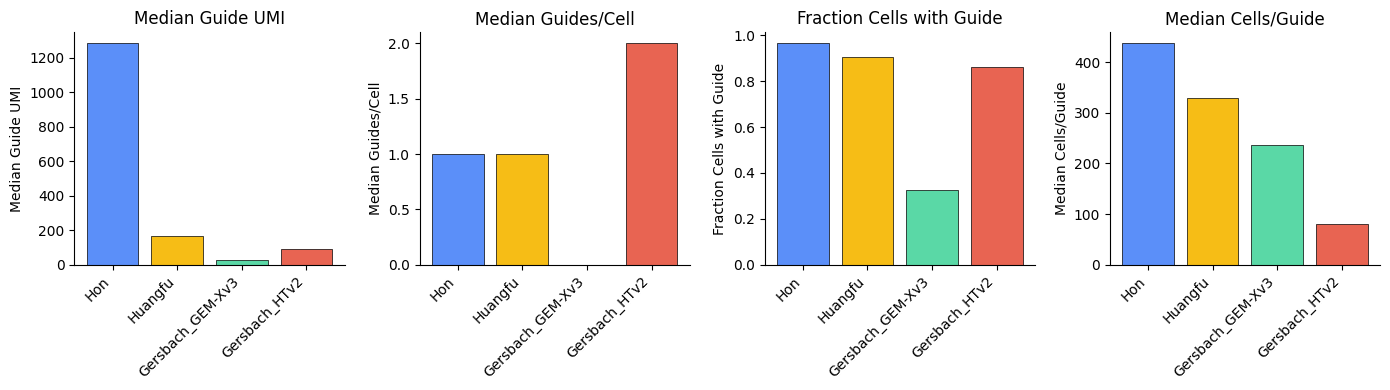

In [29]:
# Key guide metrics to compare
guide_metrics_to_plot = [
    ('guide_umi_median', 'Median Guide UMI'),
    ('guides_per_cell_median', 'Median Guides/Cell'),
    ('frac_cells_with_guide', 'Fraction Cells with Guide'),
    ('cells_per_guide_median', 'Median Cells/Guide'),
]

fig, axes = plt.subplots(1, len(guide_metrics_to_plot), figsize=(3.5 * len(guide_metrics_to_plot), 4))

for ax, (col, title) in zip(axes, guide_metrics_to_plot):
    colors = [dataset_colors.get(ds, 'gray') for ds in guide_all['dataset']]
    bars = ax.bar(range(len(guide_all)), guide_all[col], color=colors, edgecolor='black', linewidth=0.5)
    ax.set_xticks(range(len(guide_all)))
    ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                       rotation=45, ha='right')
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "guide_metrics_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Combined Summary Plot

In [30]:
# Create a combined summary with key metrics
summary = gene_all[['dataset', 'n_cells', 'umi_median', 'genes_median', 'mito_median']].merge(
    guide_all[['dataset', 'guide_umi_median', 'guides_per_cell_median', 'frac_cells_with_guide', 'cells_per_guide_median']],
    on='dataset'
)
summary

,dataset,n_cells,umi_median,genes_median,mito_median,guide_umi_median,guides_per_cell_median,frac_cells_with_guide,cells_per_guide_median
0,Hon_WTC11-benchmark_TF-Perturb-seq,91866,4839.5,2444.0,5.579399,1283.0,1.0,0.964535,437.0
1,Huangfu_WTC11-benchmark_TF-Perturb-seq,114470,4335.0,2396.0,8.527343,165.0,1.0,0.903730,330.0
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,264159,773.0,621.0,5.033557,29.0,0.0,0.324562,237.0
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,33938,23985.0,6138.0,6.705018,89.0,2.0,0.861070,80.0


In [31]:
# Save summary
summary.to_csv(OUTPUT_DIR / "metrics_summary.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'metrics_summary.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/metrics_summary.tsv


## Metrics by Lane

Compare metrics across individual lanes (batches) within each dataset.

In [32]:
# Get per-lane data (exclude 'all' aggregate)
gene_by_lane = gene_metrics_df[gene_metrics_df['batch'] != 'all'].copy()
guide_by_lane = guide_metrics_df[guide_metrics_df['batch'] != 'all'].copy()

# Add short dataset names for plotting
gene_by_lane['lab'] = gene_by_lane['dataset'].str.replace('_WTC11-benchmark_TF-Perturb-seq', '', regex=False)
guide_by_lane['lab'] = guide_by_lane['dataset'].str.replace('_WTC11-benchmark_TF-Perturb-seq', '', regex=False)

# Merge gene and guide metrics by lane
lane_metrics = gene_by_lane[['batch', 'dataset', 'lab', 'n_cells', 'umi_median', 'genes_median', 'mito_median']].merge(
    guide_by_lane[['batch', 'dataset', 'guide_umi_median', 'guides_per_cell_mean']],
    on=['batch', 'dataset'],
    how='left'
)

# Sort by dataset order then by batch
lane_metrics['dataset'] = pd.Categorical(lane_metrics['dataset'], categories=dataset_order, ordered=True)
lane_metrics = lane_metrics.sort_values(['dataset', 'batch']).reset_index(drop=True)
lane_metrics

,batch,dataset,lab,n_cells,umi_median,genes_median,mito_median,guide_umi_median,guides_per_cell_mean
0,IGVFDS6244NAXC,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,23275,5475.0,2679.0,5.699353,1353.0,1.571472
1,IGVFDS8721BKRO,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,22045,4780.0,2412.0,5.727224,1249.0,1.909140
2,IGVFDS9332KWPJ,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,21172,4532.5,2337.0,5.633409,1121.0,4.501370
3,IGVFDS9613DDRB,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,25374,4615.0,2359.0,5.299532,1397.0,1.674233
4,IGVFDS0471AYHF,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,23901,4499.0,2451.0,8.616188,218.0,1.573323
5,IGVFDS1260YCMC,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,30076,4319.0,2393.0,8.692637,172.0,1.347553
6,IGVFDS1889TBEY,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,31844,4237.0,2364.0,8.242191,146.0,1.315318
7,IGVFDS5642SPLX,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,28649,4342.0,2392.0,8.587913,148.0,1.324409
8,IGVFDS2050UJNL,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,34060,810.0,633.0,6.480654,33.0,0.916676
9,IGVFDS2155EXAM,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,98577,740.0,600.0,4.581358,23.0,0.330351


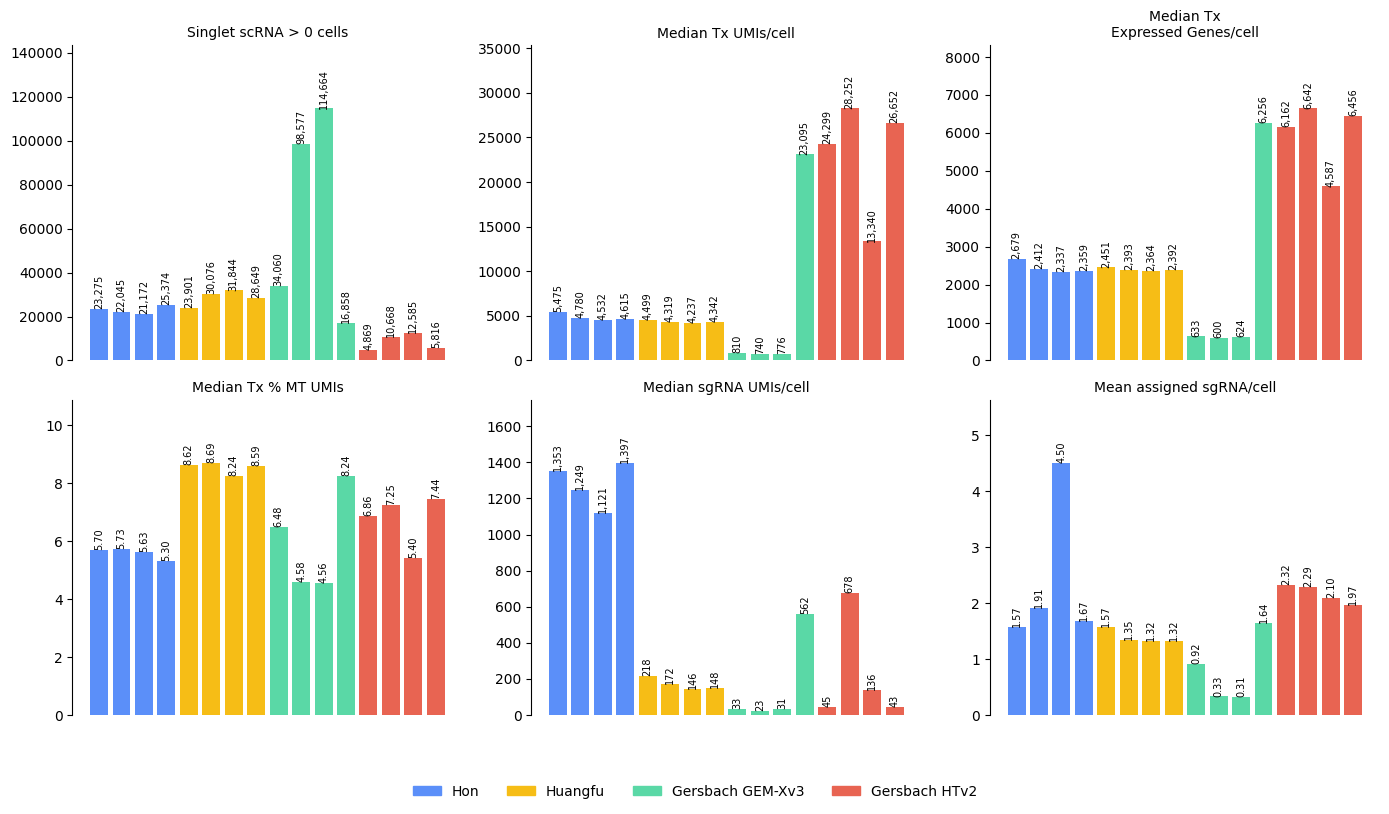

In [33]:
# Metrics to plot in 2x3 grid (matching example image)
lane_metrics_to_plot = [
    ('n_cells', 'Singlet scRNA > 0 cells'),
    ('umi_median', 'Median Tx UMIs/cell'),
    ('genes_median', 'Median Tx\nExpressed Genes/cell'),
    ('mito_median', 'Median Tx % MT UMIs'),
    ('guide_umi_median', 'Median sgRNA UMIs/cell'),
    ('guides_per_cell_mean', 'Mean assigned sgRNA/cell'),
]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for ax, (col, title) in zip(axes, lane_metrics_to_plot):
    # Get colors for each bar based on dataset
    colors = [dataset_colors.get(ds, 'gray') for ds in lane_metrics['dataset']]
    
    # Create bars
    x = np.arange(len(lane_metrics))
    bars = ax.bar(x, lane_metrics[col], color=colors, edgecolor='none', width=0.8)
    
    # Add value labels on top of bars
    for i, (bar, val) in enumerate(zip(bars, lane_metrics[col])):
        if pd.notna(val):
            # Format value
            if val >= 1000:
                label = f'{val:,.0f}'
            elif val >= 10:
                label = f'{val:.0f}'
            else:
                label = f'{val:.2f}'
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label,
                   ha='center', va='bottom', fontsize=7, rotation=90)
    
    ax.set_xticks([])
    ax.set_title(title, fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Add some padding at top for labels
    ymax = lane_metrics[col].max()
    if pd.notna(ymax):
        ax.set_ylim(0, ymax * 1.25)

# Add legend
legend_handles = [plt.Rectangle((0,0),1,1, color=dataset_colors[ds]) 
                  for ds in dataset_order]
legend_labels = [ds.replace('_WTC11-benchmark_TF-Perturb-seq', '').replace('_', ' ') 
                 for ds in dataset_order]
fig.legend(legend_handles, legend_labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, -0.02), frameon=False, fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.savefig(OUTPUT_DIR / "metrics_by_lane_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Save lane metrics
lane_metrics.to_csv(OUTPUT_DIR / "metrics_by_lane.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'metrics_by_lane.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/metrics_by_lane.tsv


---
# DONE!